# Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler #scaling
from sklearn.utils import resample #resampling

In [22]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1


## 1. Imputasi missing value dengan mean, median, dan modus

In [5]:
# cek missing value sebelum imputasi
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [10]:
# Imputasi missing value dengan mean
df_mean = df.fillna(df.mean())

# Imputasi missing value dengan median
df_median = df.fillna(df.median())

# Imputasi missing value dengan modus
df_modus = df.fillna(df.mode().iloc[0])

In [11]:
# cek missing value setelah imputasi missing value dengan mean
df_mean.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 2. Cek korelasi antar variabel dengan heatmap

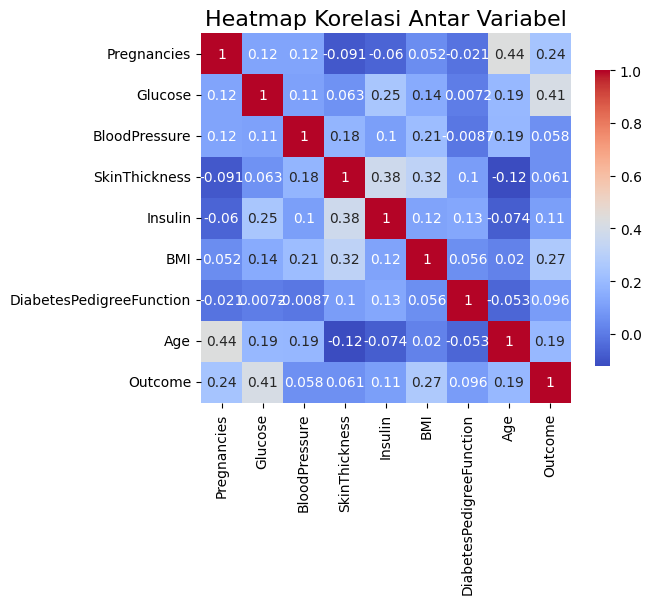

In [18]:
# visualisasi heatmap utk melihat korelasi anatarvariabel
sns.heatmap(df_mean.corr(), annot = True, cmap = 'coolwarm',
            square = True, cbar_kws = {"shrink": .8})
plt.title('Heatmap Korelasi Antar Variabel', fontsize = 16)
plt.show()

## 3. Lakukan imbalance handling dengan undersampling

In [21]:
# imbalance handling dengan undersampling
x = df_mean.drop('Outcome', axis = 1)
y = df_mean['Outcome']

# memisahkan data menjadi mayoritas dan minoritas
mayoritas = x[y == 0]
minoritas = x[y == 1]

# undersampling pada mayoritas
mayoritas_undersample = resample(mayoritas, replace = False, n_samples = len(minoritas))

# menggabungkan data mayoritas dan minoritas
x_undersample = pd.concat([mayoritas_undersample, minoritas])
y_undersample = np.concatenate([np.zeros(len(mayoritas_undersample)), np.ones(len(minoritas))])

## 4. Lakukan scaling dengan robust scaler dan minmax

In [23]:
# sebelum dilakukan scaling
df_mean.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,627.0,33.166124,1
1,1.0,85.000000,66.0,29.0,0.0,31.99368,351.0,31.000000,0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,672.0,32.000000,1


In [24]:
# scaling dengan robust scaler
scaler_robust = RobustScaler()
x_robust = scaler_robust.fit_transform(x_undersample)

# scaling dengan minmax scaler
scaler_minmax = MinMaxScaler()
x_minmax = scaler_minmax.fit_transform(x_undersample)

In [31]:
# setelah dilakukan scaling dengan robust
pd.DataFrame(x_robust).head(3)

,0,1,2,3,4,5,6,7
0,0.000000,-1.457291,0.000000,0.0000,-0.265509,0.762243,-0.200637,1.152823
1,0.039363,0.931598,0.253393,0.1875,0.000000,-0.150800,-0.031847,0.319490
2,0.000000,0.000000,-0.913274,0.2500,-0.560747,0.000000,-0.038217,-0.680510


In [32]:
# setelah dilakukan scaling dengan minmax
pd.DataFrame(x_minmax).head(3)

,0,1,2,3,4,5,6,7
0,0.223717,0.341709,0.604906,0.232323,0.090239,0.529061,0.285764,0.509804
1,0.235294,0.773869,0.631579,0.292929,0.141581,0.466468,0.338931,0.313725
2,0.223717,0.605339,0.508772,0.313131,0.033149,0.476806,0.336925,0.078431
